<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망

**심층 신경망**

* 2개 이상의 층을 포함한 신경망

* 종종 다층 인공 신경망, 심층 신경망, 딥러닝을 같은 의미로 사용

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

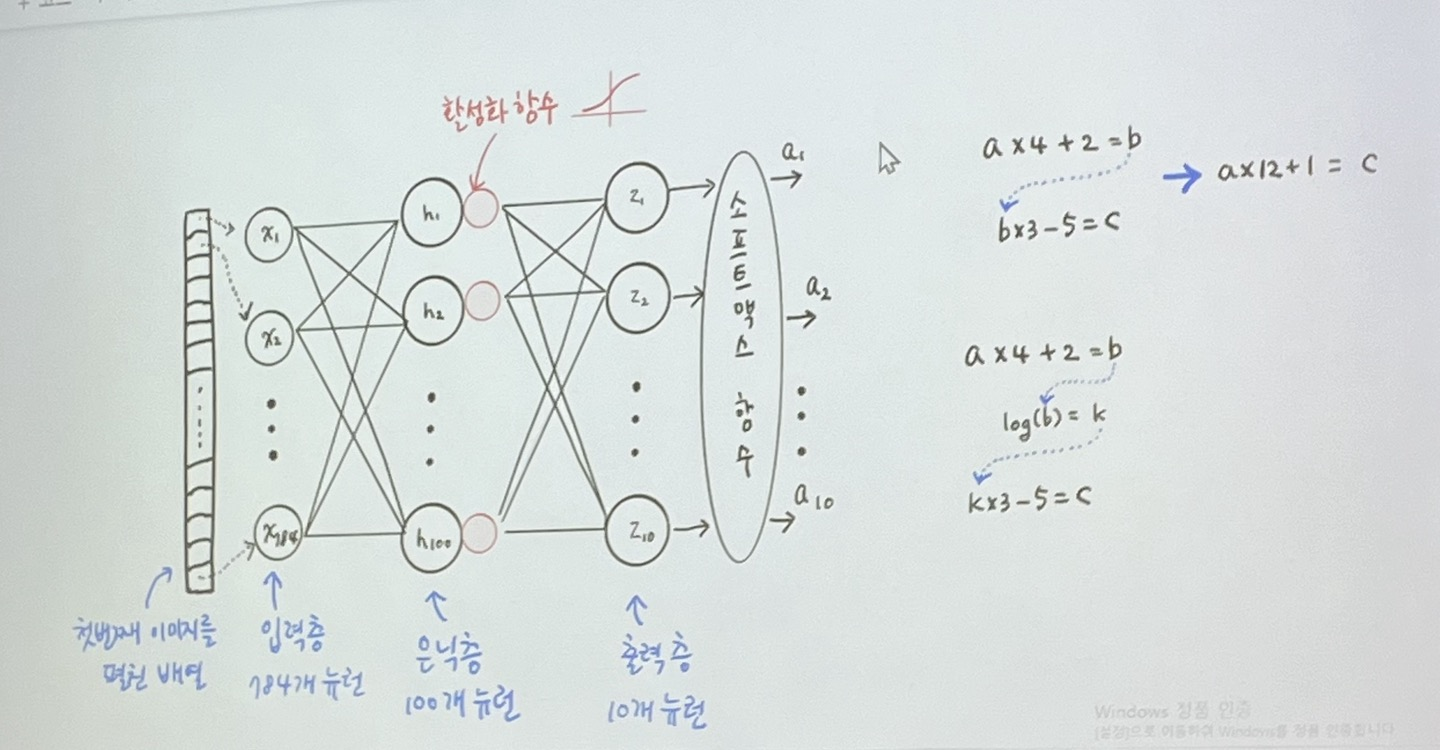

**은닉층(hidden layer)**

입력층과 출력층 사이엥 있는 모든 층

출력층에서는 소프트맥스나 시그모이드 함수를 써야 함

활성화 함수의 ㅅ너택이 자유로움

왜 은닉층에 활성화 함수를 적용하는가?

활성화 함수 없이 은닉층만 있다면 의미가 없기 때문

예를 들어, 아래 두 선형 방정식이 있다고 가정하면

a*4+2=b

b*3-5=c

a*12+1=c 이므로

선형 방정식이 의미가 없어 진다.


dense1: 은닉층, 100개의 뉴런을 가지는 밀집층

은닉층의 뉴런 개수를 정하는 데는 특별한 기준이 없음

따라서 몇 개의 뉴런을 두어야 할 지 판단하기 위해서는 상당한 경험이 필요함

한 가지 제약 사항은 적으도 출력층의 뉴런보다는 많게 만들어야함

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))

dense2: 출력층, 10개의 클래스를 분류하므로 10개의 뉴런을 설정하고 활성화 함수로 소프트맥스 함수를 지정

또한 첫 번째 밀집층이 아니므로 input_shape를 지정할 필요가 없음

In [ ]:
dense2 = keras.layers.Dense(10, activation='softmax')

심층 신경망 만들기

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "Sequential" <- 모델 이름

---
이 모델에 들어 있는 층이 순서대로 나열

층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력

층을 만들 때 name 매개변수로 이름 지정 가능

미지정시 자동으로 dense라고 이름  붙임

---

각 뉴런당 784+1 100개 있으니까 78500개

각 뉴런이 100+1 101개가 10개 으니까 1010개

총 79510개의 모델 파라미터

78500에서 100나누고 1빼면 784

---

출력 크기의 (None, 100)에서 첫 번째 차원은 샘플의 개수를 나타냄

현재 샘플 개수가 아직 정의되어 있지 않기 때문에 None

(784, )은 한 샘플의 크기를 뜻하는 거지 샘플의 수를 뜻하지 않음

케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행

즉, 미니배치 경사 하강법을 사용

케라스의 기본 미니배치 크기는 32이며 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있음

따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정

이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원이라고 함

두 번째 차원은 뉴런 개수 또는 출력 개수

즉, 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축됨

---

모델 파라미터 개수

(입력값 개수 +1)*뉴런 개수

---

마지막에는 총 모델 파라미터 개수, 훈련된 파라미터 개수, 그리고 훈련되지 않는 파라미터 개수가 나옴

간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있음





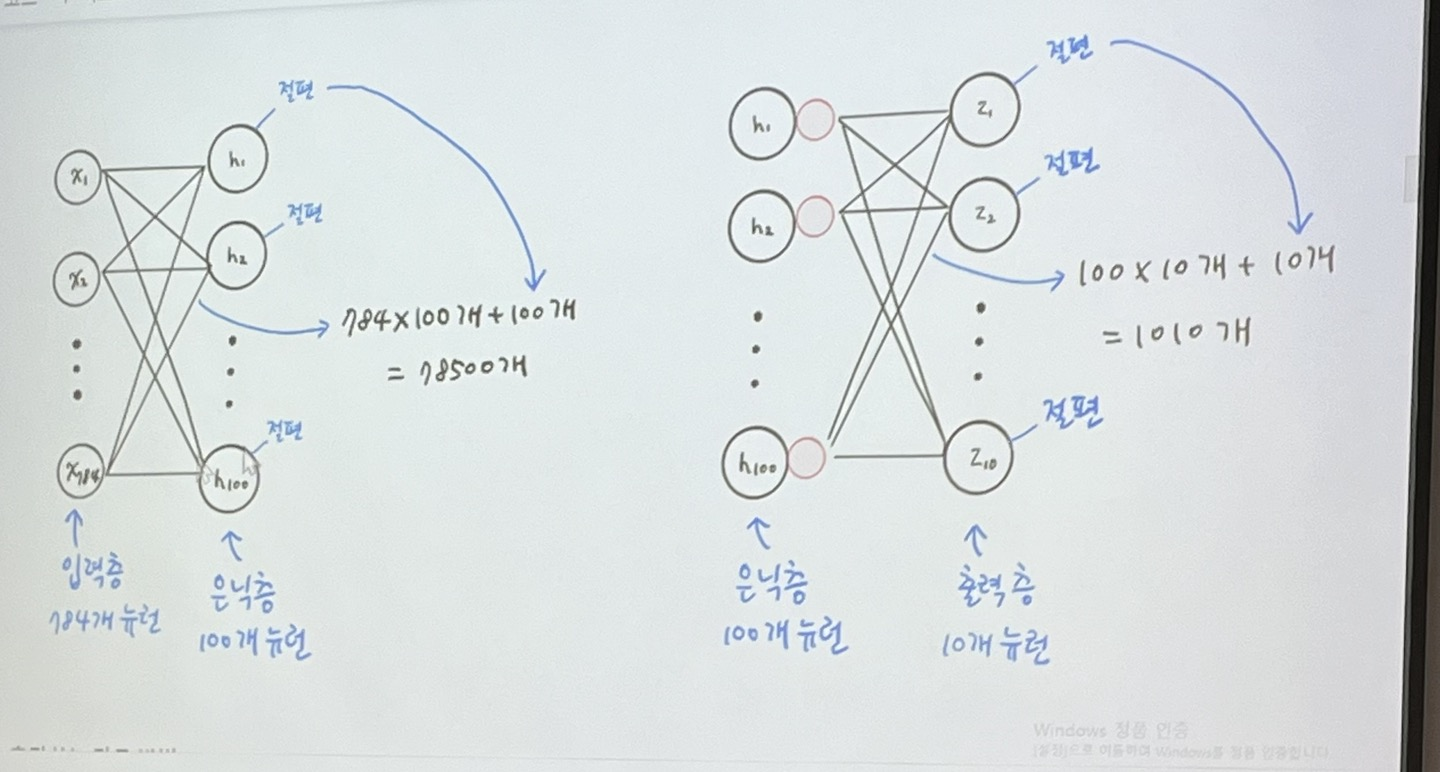

**층을 추가하는 다른 방법**

따로 Dense 클래스를 만들지 않고 Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 생성

추가되는 층을 한눈에 손쉽게 알아볼 수 있음

모델의 이름과는 다르게 층의 이름은 반드시 영문이어야 함

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


편리하나 아주 많은 층을 추가하려면 Sequential 클래스의 생성자가 매우 길어짐

또 조건에 따라 층을 추가할 수도 없음

**층을 추가하는 또 다른 방법**

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5759 - accuracy: 0.8076
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4118 - accuracy: 0.8512
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3769 - accuracy: 0.8635
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3533 - accuracy: 0.8714
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3360 - accuracy: 0.8783


활성 함수를 바꿔보자

초창기 인공 신경망의 은닉층에 많이 사용된 함수는 시그모이드 함수이나 단점이 잇음

양 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못함

특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 함

이를 개선하기 위해 다른 종류의 활성화 함수인 렐루 함수가 제안됨

---

**렐루(ReLU)함수**

입력이 양수일 때, 입력을 그대로 통과시키고 음수일 경우 0으로 설정함

렐루 함수는 max(0,z)와 같이 쓸 수 도 있음

이 함수는 z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력

렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려짐

**Flatten 층**

케라스에서 제공하는 편리한 층

지금까지 2차원 이상의 넘파이 배열의 데이터를 reshape() 메서드를 이용해 1차원으로 변경함

Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함

데이터의 첫 번째 축(0번 축)을 배치 축(batch axis) 또는 배치 차원(batch dimension)이라고 부름

입력에 곱해지는 가중치나 절편이 없어서 성능에 기여하는 것은 없음

그러나 Flatten 클래스는 입력층과 은닉층 사이에 추가되기 때문에 층이라 부름

하지만 Flatten 클래스는 학습하는 층이 아니므로 이 신경망의 깊이가 3인 신경망이라고 하지는 않음

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


첫 번쨰 등장하는 Flastten클래스에 포함된 모델 파라미터는 0개

케라스의 Flatten층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있음

케라스 API는 입력 데이터에 대한 전처리 과정을 될 수 있으면 모델에 포함시킴

훈련 데이터 재생성

이전과 다른점은 reshape()메서드를 사용하지 않음

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 # 정규

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5269 - accuracy: 0.8142
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3909 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3536 - accuracy: 0.8728
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3311 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3126 - accuracy: 0.8889


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8752


[0.37579846382141113, 0.875166654586792]

시그모이드 함수를 사용했을 때 보다 성능이 약간 향상

**옵티마이저(optimizer)**

신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법

사용할 경사 하강법 알고리즘과 그 파라미터를 지정하는 매개변수

---

신경망에는 하이퍼파라미터가 많음

추가할 은닉층의 개수, 은닉층의 뉴련 개수, 사용할 활성화 함수, 사용할 층의 종류,

fit 메서드의 미니배치 개수, epochs 매개변수

compile() 메서드의 경사 하강법 알고리즘도 하이퍼파라미터

케라스의 기본 세팅된 경사 하강법 알고리즘은 RMSprop이고 RMSprop의 학습률 또한 하이퍼파라미터

케라스는 다양한 종류의 경사 하강법 알고리즘(4-2절 참고)을 제공하여 이들을 옵티마이저(optimizer)라고 함

---

SGD 경사 하강법 최적화

학습률 조절

sgd = keras.optimizers.SGD(learning_rate=0.1) #기본값은 0.01

모멘텀 최적화

모멘텀(관성, 운동량) 조절

sgd = keras.optimizers.SGD(momenteum=0.9) #기본값은 0

새로운 가중치와 절편을 계산할 때, 과거의 가중치와 절편의 변화량을 어느 정도 반영할 것인지 결정함

간단히 말하면 한 번에 이동하는 가중치와 절편의 크기에 변화를 줌

여기서 표시된 loss는 절대제곱오차

네스테로프 모멘텀 최적화(네스테로프 가속 경사)

sgd =  keras.optimizers.SGD(momentum=0.9, nesterov=True) #기본값은 0

모멘텀 최적화를 2번 반복하여 구현

모멘텀 최적화와 비교하면 손실함수의 입력인 이전의 기울기와 절편에 추가로 이전 속도가 더해진다는 점임

대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공

**적응적 학습률(adaptive learning rate)**

모델이 최적점에 가까이 갈수록 학습률을 낮출수 있는 방식

즉, 학습률에 자동으로 변화를 줌

이러면 안정적으로 최적점에 수렴할 가능성이 높음

이러한 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있음

대표적인 옵티마이저는 Adagrad 와 RMSprop

Adagrad(Adaptive gradiant descent):

그레이디언트 제곱을 누적하여 학습률을 나눔

누적 초기값은 initial_accumulator_value 매개변수로 지정

adagrad = keras.optimizers.Adagrad(learning_rate=0.1, initial_accumulator_value=1) #기본값은 0.001, 0.1

RMSprop(Root Mean Square Propagation):

그레이디언트 제곱을 누적하여 학습률을 나누지만 최근의 그레이디언트를 사용하기 위해 지수 감소를 사용

감소 비율은 rho 매개변수에서 지정

rho를 조절하여 이전 기울기들과 현재 기울기의 가중치를 설정함

rho가 1에 가까울수록 이전 기울기들을 중요하시하고 0에 가까울수록 현재 기울기를 중요시함

rmsporp = keras.optimizers.RMSprop(learning_rate=0.1, rho=1) #기본값은 0.001, 0.9

Adam(Adaptive Moment Estimation):

모멘텀 최적화와 RMSprop의 장점을 접목한 것

adam = keras.optimizers.Adam(learning_rate=0.1, beta_1=1, beta_2=1) #기본값은 0.001, 0.9, 0.999

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5210 - accuracy: 0.8189
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3909 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3511 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3259 - accuracy: 0.8799
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3057 - accuracy: 0.8870


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8808


[0.3375511169433594, 0.8808333277702332]

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.8, beta_2=0.9)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)